# Machine Learning Project 2
## House Price Prediction

### Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

General flow for using sklearn

In [1]:
import pandas as pd # dataframe
import numpy as np # list

# Data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn library
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

## Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CSTU/ML/

Mounted at /content/drive
/content/drive/My Drive/CSTU/ML


In [3]:
train = pd.read_csv('./data/house-prices/house-train.csv')
final_test = pd.read_csv('./data/house-prices/house-test.csv')

In [4]:
print(f'train shape: {train.shape}')
print(f'final_test shape: {final_test.shape}')

train shape: (1460, 81)
final_test shape: (1459, 80)


## Data analysis and clean

#### Data analysis 1: na values

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
features_na_train = [f for f in train.columns if train[f].isnull().sum() >= 1]
features_na_train

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
features_na_test = [f for f in final_test.columns if final_test[f].isnull().sum() >= 1]
features_na_test

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [10]:
missing_train_percent = train.isnull().sum().sort_values(ascending=False)/train.shape[0]
missing_train_percent = missing_train_percent[missing_train_percent > 0]
missing_train_percent

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479


In [11]:
missing_final_test_percent = final_test.isnull().sum().sort_values(ascending=False)/final_test.shape[0]
missing_final_test_percent = missing_final_test_percent[missing_final_test_percent > 0]
missing_final_test_percent

,0
PoolQC,0.997944
MiscFeature,0.965045
Alley,0.926662
Fence,0.801234
MasVnrType,0.612748
FireplaceQu,0.500343
LotFrontage,0.155586
GarageYrBlt,0.053461
GarageQual,0.053461
GarageFinish,0.053461


**'PoolQC', 'MiscFeature', 'Alley'** has more than 90% missing.<br>
**'Fence"** has more than 80% missing

<Axes: >

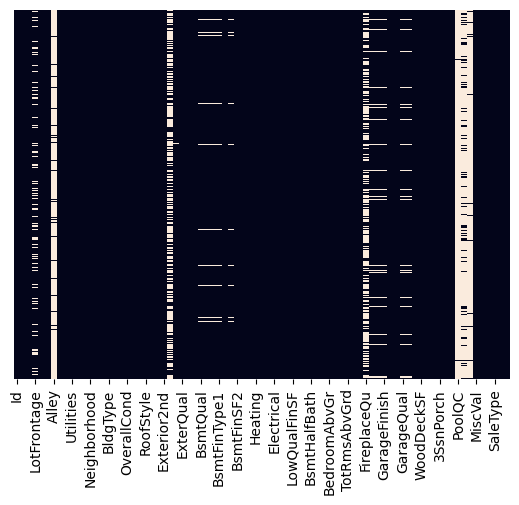

In [12]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

#### Check the relation of 'PoolQC' to 'SalePrice'

Fill in na for 'PoolQC'

In [13]:
train['PoolQC'] = train['PoolQC'].fillna('None')
final_test['PoolQC'] = final_test['PoolQC'].fillna('None')
corr_pool = train[['PoolQC', 'SalePrice']].groupby('PoolQC').median()
print(corr_pool)

        SalePrice
PoolQC           
Ex       490000.0
Fa       215500.0
Gd       171000.0
None     162900.0


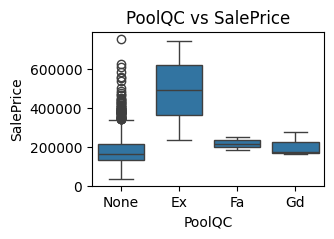

In [14]:
# Plot PoolQC vs SalePrice to see if there's any significant relationship
plt.figure(figsize=(3, 2))
sns.boxplot(x='PoolQC', y='SalePrice', data=train)
plt.title('PoolQC vs SalePrice')
plt.show()

'Ex' type in 'PoolQC' has significant different saleprice, need to keep 'PoolQC'

#### Check the relation of 'MiscFeature' to 'SalePrice'

In [15]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')
corr_misc = train[['MiscFeature', 'SalePrice']].groupby('MiscFeature').median()
print(corr_misc)

             SalePrice
MiscFeature           
Gar2          170750.0
None          164250.0
Othr           94000.0
Shed          144000.0
TenC          250000.0


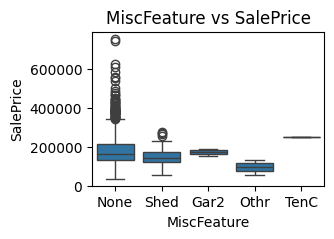

In [16]:
# Plot MiscFeature vs SalePrice to see if there's any significant relationship
plt.figure(figsize=(3, 2))
sns.boxplot(x='MiscFeature', y='SalePrice', data=train)
plt.title('MiscFeature vs SalePrice')
plt.show()

#### Check the relation of 'Alley' to 'SalePrice'

In [17]:
train['Alley'] = train['Alley'].fillna('None')
corr_alley = train[['Alley', 'SalePrice']].groupby('Alley').median()
print(corr_alley)

       SalePrice
Alley           
Grvl    119500.0
None    165000.0
Pave    172500.0


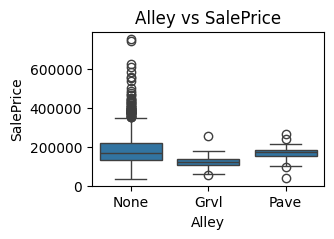

In [18]:
# Plot Alley vs SalePrice to see if there's any significant relationship
plt.figure(figsize=(3, 2))
sns.boxplot(x='Alley', y='SalePrice', data=train)
plt.title('Alley vs SalePrice')
plt.show()

#### Check the relation of 'Fence' to 'SalePrice'

In [19]:
train['Fence'] = train['Fence'].fillna('None')
corr_alley = train[['Fence', 'SalePrice']].groupby('Fence').median()
print(corr_alley)

       SalePrice
Fence           
GdPrv   167500.0
GdWo    138750.0
MnPrv   137450.0
MnWw    130000.0
None    173000.0


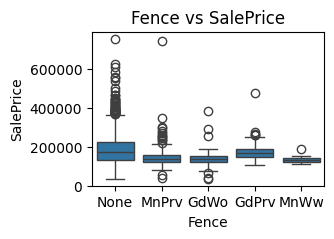

In [20]:
# Plot Alley vs SalePrice to see if there's any significant relationship
plt.figure(figsize=(3, 2))
sns.boxplot(x='Fence', y='SalePrice', data=train)
plt.title('Fence vs SalePrice')
plt.show()

'MiscFeature', 'Alley', 'Fence' can be dropped, 'PoolQC' need to keep

In [21]:
features_to_drop = []
features_to_drop.extend(['MiscFeature', 'Alley', 'Fence'])

#### Data analysis 2 : distribution

Unique value counts for Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
----------------------------------------


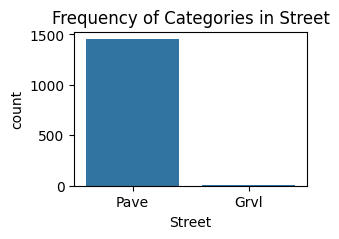

Unique value counts for Alley:
Alley
None    1369
Grvl      50
Pave      41
Name: count, dtype: int64
----------------------------------------


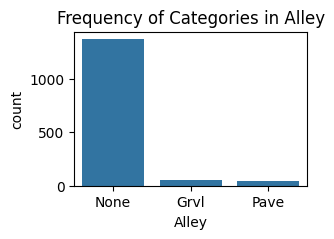

Unique value counts for LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
----------------------------------------


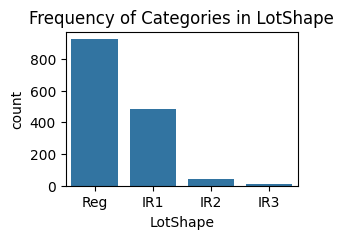

Unique value counts for LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
----------------------------------------


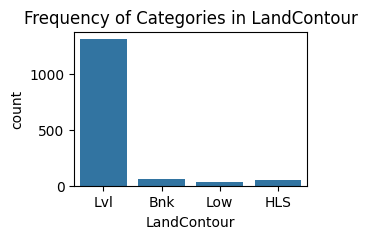

Unique value counts for Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
----------------------------------------


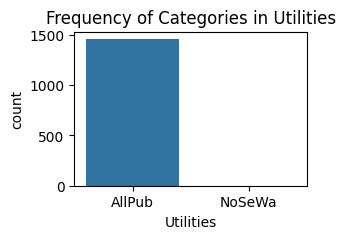

Unique value counts for LandSlope:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
----------------------------------------


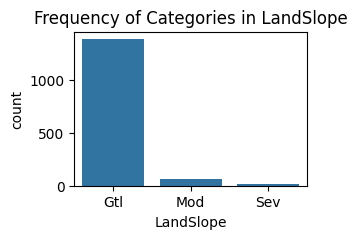

Unique value counts for MasVnrType:
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
----------------------------------------


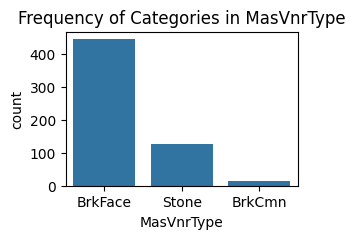

Unique value counts for ExterQual:
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64
----------------------------------------


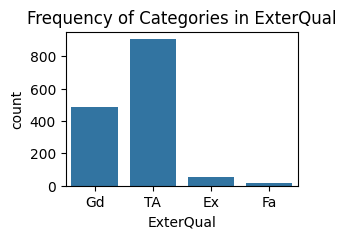

Unique value counts for CentralAir:
CentralAir
Y    1365
N      95
Name: count, dtype: int64
----------------------------------------


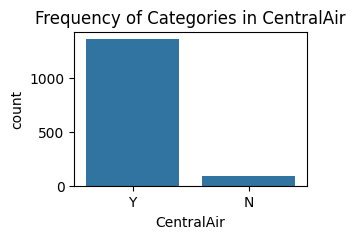

Unique value counts for BsmtFullBath:
BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64
----------------------------------------


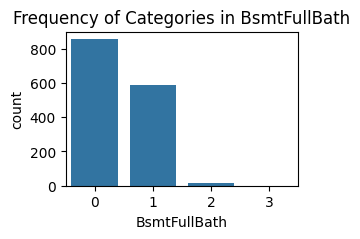

Unique value counts for BsmtHalfBath:
BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64
----------------------------------------


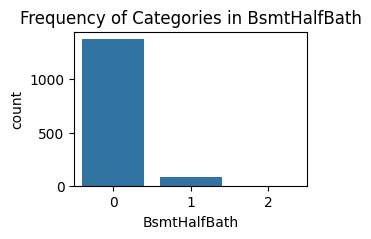

Unique value counts for FullBath:
FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64
----------------------------------------


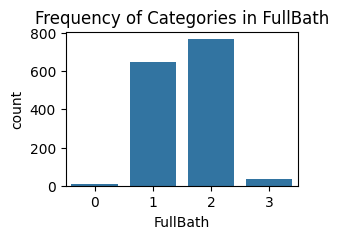

Unique value counts for HalfBath:
HalfBath
0    913
1    535
2     12
Name: count, dtype: int64
----------------------------------------


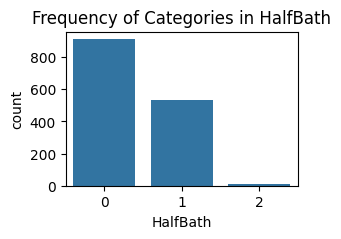

Unique value counts for KitchenAbvGr:
KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64
----------------------------------------


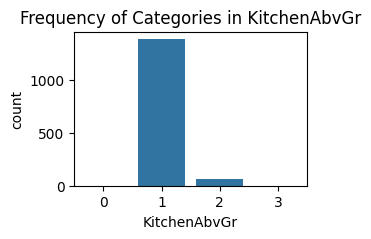

Unique value counts for KitchenQual:
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64
----------------------------------------


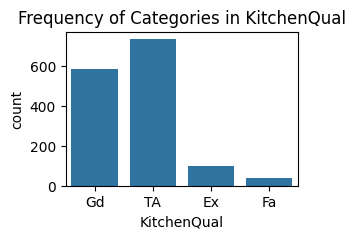

Unique value counts for Fireplaces:
Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64
----------------------------------------


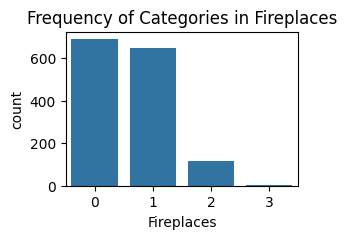

Unique value counts for GarageFinish:
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
----------------------------------------


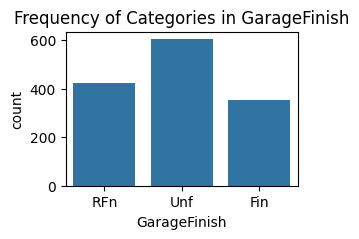

Unique value counts for PavedDrive:
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64
----------------------------------------


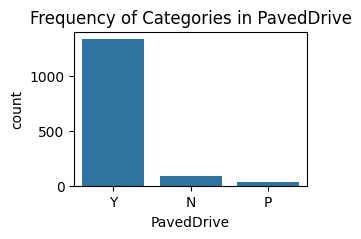

Unique value counts for PoolQC:
PoolQC
None    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64
----------------------------------------


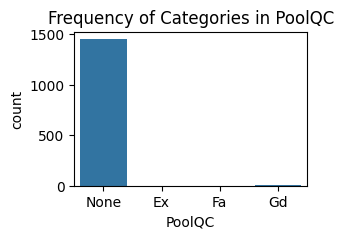

In [22]:
# find features whose unique value counts less than 5
for f in train.columns:
  if len(train[f].unique()) < 5:
    print(f"Unique value counts for {f}:")
    print(train[f].value_counts())
    print("-" * 40)

    plt.figure(figsize=(3, 2))
    sns.countplot(x=f, data=train)
    plt.title(f'Frequency of Categories in {f}')
    plt.show()

#### Check the relation of 'Utilities' to 'SalePrice'
#### 'Utilities' can be dropped: 'Utilities' has 1459 of 'AllPub' and 1 of 'NoSeWa'

In [23]:
print(final_test['Utilities'].value_counts())

Utilities
AllPub    1457
Name: count, dtype: int64


In [24]:
features_to_drop.append('Utilities')

#### Drop some features

In [25]:
print(f'train shape: {train.shape}')
print(f'final_test shape: {final_test.shape}')

train shape: (1460, 81)
final_test shape: (1459, 80)


In [26]:
features_to_drop

['MiscFeature', 'Alley', 'Fence', 'Utilities']

In [27]:
for f in features_to_drop:
  train.drop([f], axis=1, inplace=True)
  final_test.drop([f], axis=1, inplace=True)

In [28]:
print(f'train shape: {train.shape}')
print(f'final_test shape: {final_test.shape}')

train shape: (1460, 77)
final_test shape: (1459, 76)


### Numerical Features and Categorical Features

In [29]:
num_features = []
cat_features = []
for f in train.columns:
  if train[f].dtypes in ['int64', 'float64']:
    num_features.append(f)
  else:
    cat_features.append(f)

def print_flist(f, line_size = 5):
  for i in range(0, len(f), line_size):
    print(f[i:i+line_size])

print('Numerical features: ', len(num_features))
print_flist(num_features)
print('Categorical features: ', len(cat_features))
print_flist(cat_features)

Numerical features:  38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']
['OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']
['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath']
['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
['GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
['MoSold', 'YrSold', 'SalePrice']
Categorical features:  39
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig']
['LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType']
['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']
['MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating']
['HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional']
['Fireplac

### Numerical features

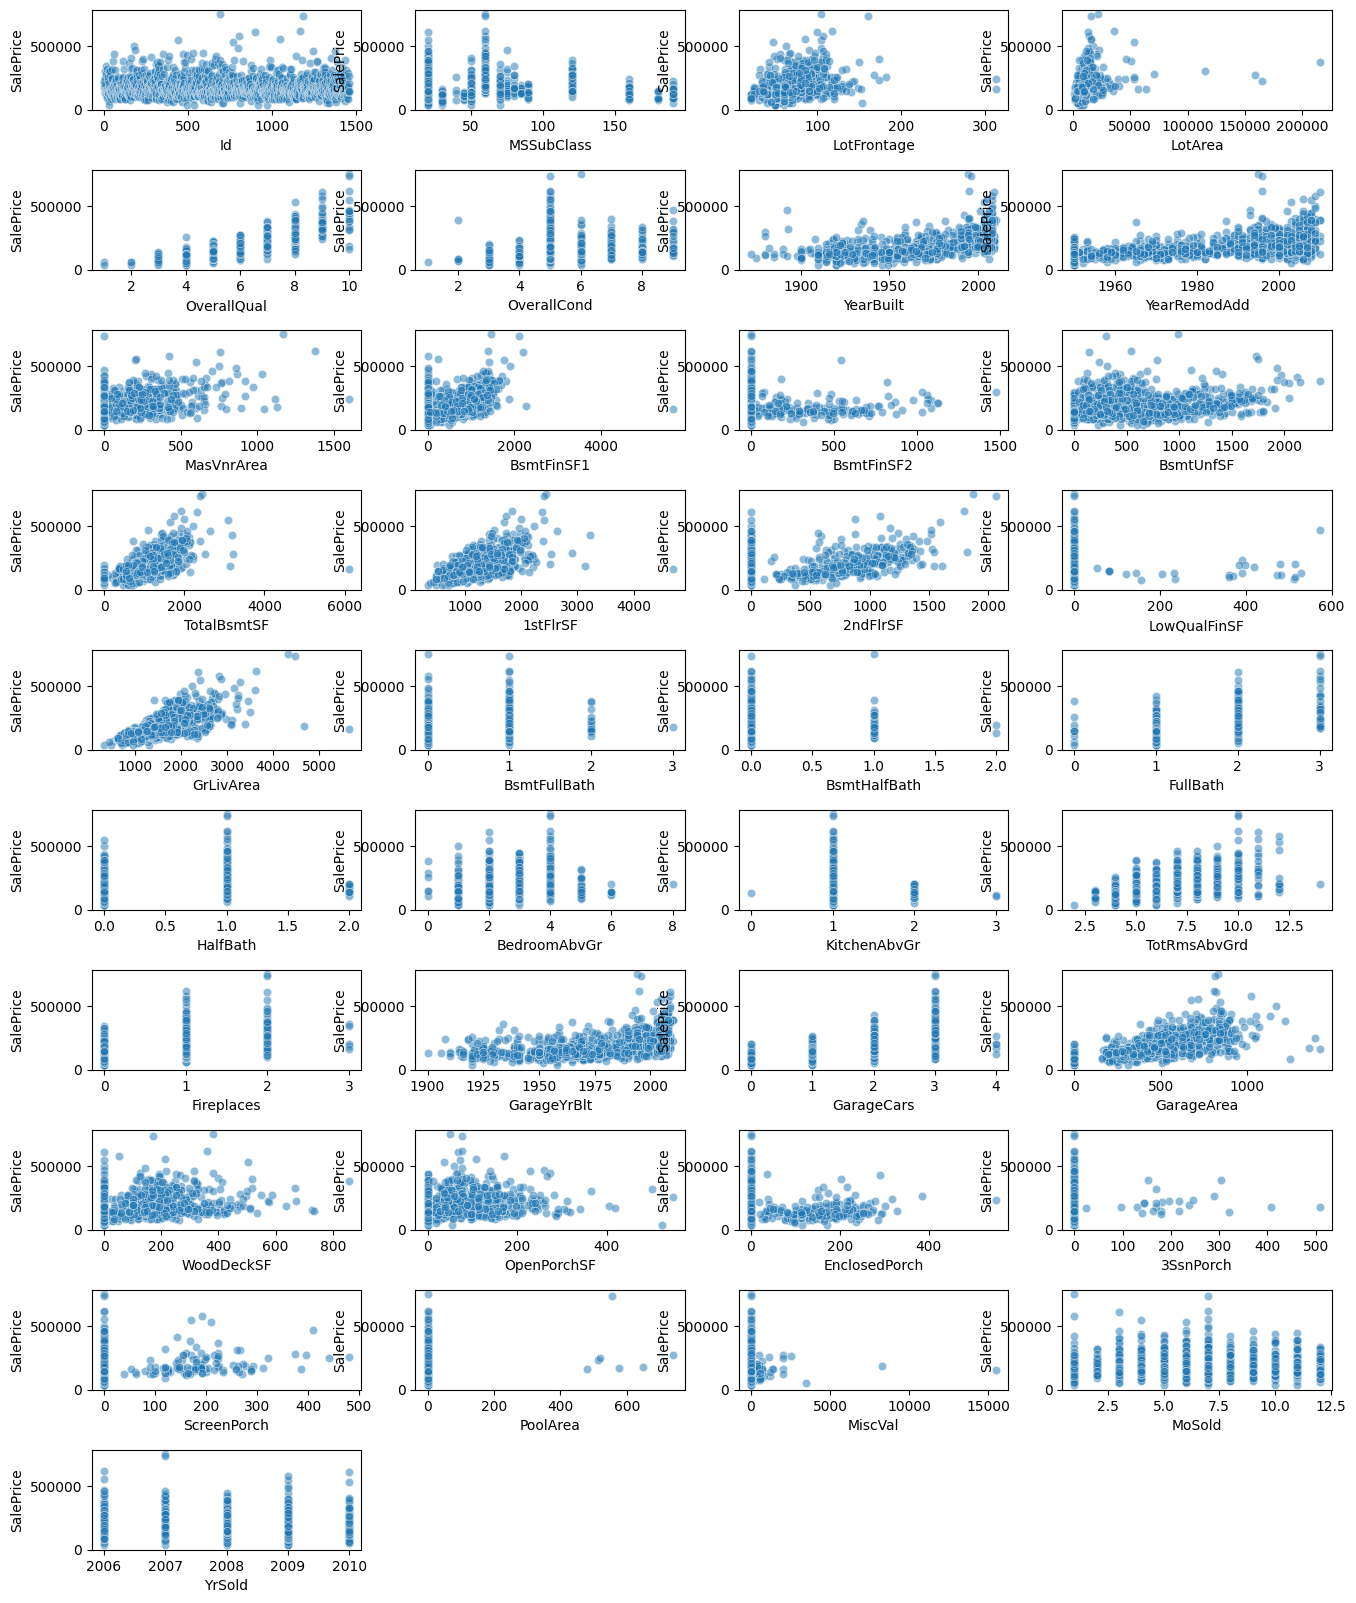

In [30]:
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.6, wspace=0.2)
for i,f in enumerate(num_features):
  if f != 'SalePrice':
    plt.subplot(10, 4, i+1)
    sns.scatterplot(x=f, y='SalePrice', data=train, alpha=0.5)
    plt.xlabel(f)
    plt.ylabel('SalePrice')
plt.show()

#### Data clean: remove Outliers

In [31]:
train.shape

(1460, 77)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

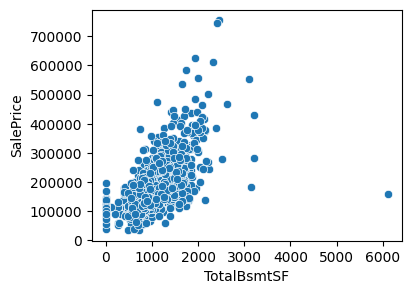

In [32]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

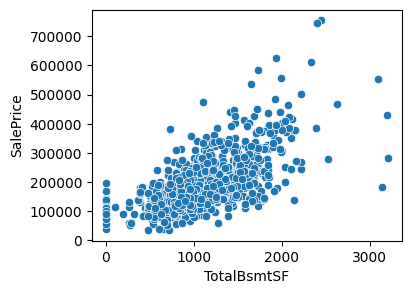

In [33]:
train = train.drop(train[(train['TotalBsmtSF']>6000) & (train['SalePrice']<200000)].index)
plt.figure(figsize=(4, 3))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train)

In [34]:
train.shape

(1459, 77)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

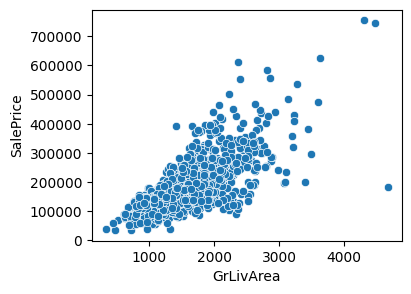

In [35]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

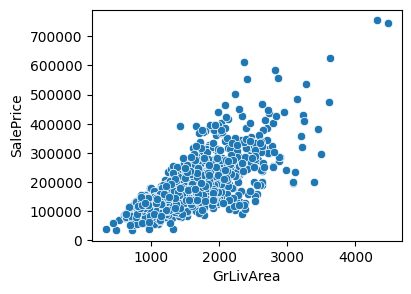

In [36]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
plt.figure(figsize=(4, 3))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

In [37]:
train.shape

(1458, 77)

In [38]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,0,None,0,12,2008,WD,Normal,250000


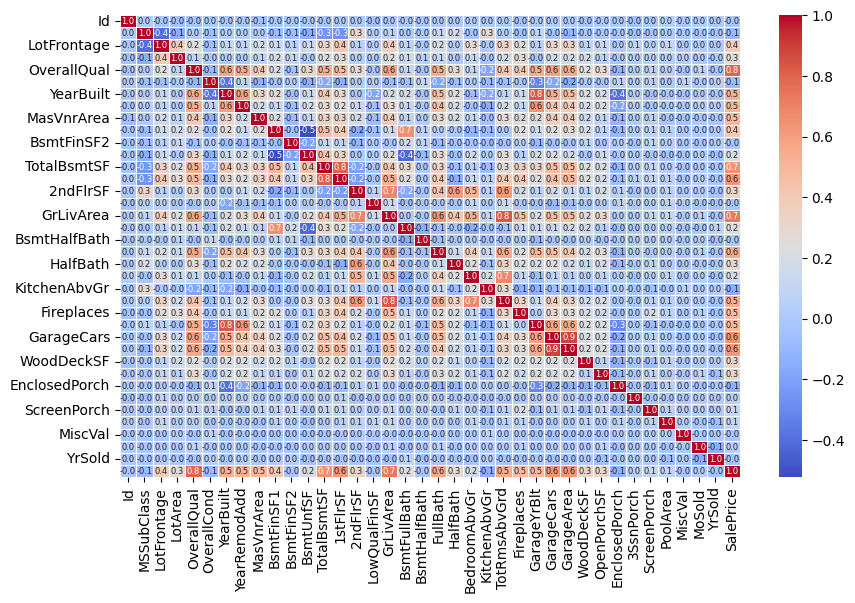

In [39]:
corrs_num = train[num_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corrs_num, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, annot_kws={'size': 6})
plt.show()

In [40]:
missing_num_features_train = [f for f in num_features if train[f].isnull().sum() > 0]
missing_num_features_train

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [41]:
num_features.remove('SalePrice')
missing_num_features_final_test = [f for f in num_features if final_test[f].isnull().sum() > 0]
missing_num_features_final_test

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

### Numeric Features: Year features
fill in the year of 'YearBuilt' for the null value in 'GarageYrBlt'

In [42]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['YearBuilt'])
final_test['GarageYrBlt'] = final_test['GarageYrBlt'].fillna(final_test['YearBuilt'])

In [43]:
missing_num_features_train.remove('GarageYrBlt')
missing_num_features_final_test.remove('GarageYrBlt')

fill in median values for 'LotFrontage', 'MasVnrArea'

In [44]:
for f in missing_num_features_train:
  train[f] = train[f].fillna(train[f].median())

In [45]:
for f in missing_num_features_final_test:
  final_test[f] = final_test[f].fillna(final_test[f].median())

In [46]:
missing_cat_features_train = [f for f in cat_features if train[f].isnull().sum() > 0]
missing_cat_features_train

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

#### Categorical values

In [47]:
missing_cat_features_final_test = [f for f in cat_features if final_test[f].isnull().sum() > 0]
missing_cat_features_final_test

['MSZoning',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

For 'Bsmt', 'FireplaceQu', 'Garage', impute with 'None'.
These features na values may mean none.

In [48]:
fill_na_cat_list = ['MasVnrType', \
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', \
                'FireplaceQu',\
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for f in fill_na_cat_list:
  train[f] = train[f].fillna('None')
  final_test[f] = final_test[f].fillna('None')

For 'Electrical', fill in na

In [49]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
final_test['Electrical'] = final_test['Electrical'].fillna(final_test['Electrical'].mode()[0])

In [50]:
train.isnull().any().any()

False

In [51]:
fill_na_cat_list_final_test_diff = ['MSZoning', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']
for f in fill_na_cat_list_final_test_diff:
  final_test[f] = final_test[f].fillna(final_test[f].mode()[0])

In [52]:
final_test.isnull().any().any()

False

<Axes: >

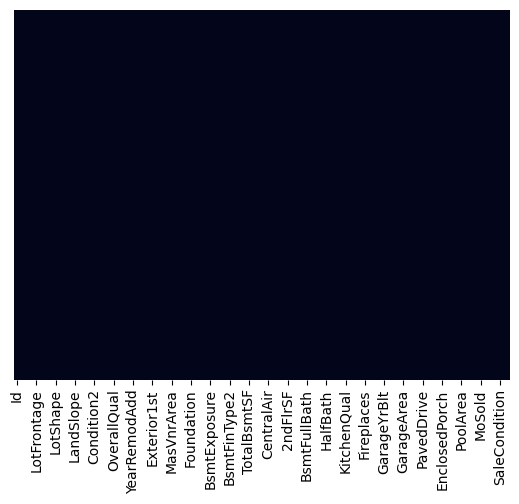

In [53]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [54]:
print(f'train shape: {train.shape}')
print(f'final_test shape: {final_test.shape}')

train shape: (1458, 77)
final_test shape: (1459, 76)


In [55]:
train.dropna(inplace=True)
final_test.dropna(inplace=True)

In [56]:
print(f'train shape: {train.shape}')
print(f'final_test shape: {final_test.shape}')

train shape: (1458, 77)
final_test shape: (1459, 76)


In [57]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,0,None,0,12,2008,WD,Normal,250000


## Encoding Categorical Variables

#### Label encoding

In [58]:
label_encoder = LabelEncoder()

In [59]:
for f in cat_features:
  train[f] = label_encoder.fit_transform(train[f])
  final_test[f] = label_encoder.fit_transform(final_test[f])

In [60]:
print(f'train shape: {train.shape}')
print(f'final_test shape: {final_test.shape}')

train shape: (1458, 77)
final_test shape: (1459, 76)


In [61]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,4,0,...,0,0,0,3,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,2,0,...,0,0,0,3,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,4,0,...,0,0,0,3,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,0,3,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,2,0,...,0,0,0,3,0,12,2008,8,4,250000


### Train-Test Split

In [62]:
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

In [64]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1166, 75)
X_test shape: (292, 75)
y_train shape: (1166,)
y_test shape: (292,)


In [65]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
830,20,3,80.0,11900,1,0,3,0,0,12,...,0,0,192,0,3,0,6,2008,8,4
205,20,3,99.0,11851,1,3,3,0,0,8,...,0,508,0,0,3,0,5,2009,8,4
271,20,3,73.0,39104,1,0,2,1,2,4,...,0,0,0,0,3,0,4,2008,8,4
236,20,3,65.0,8773,1,3,3,2,0,5,...,0,0,0,0,3,0,5,2010,8,4
508,70,4,60.0,9600,1,3,3,4,0,17,...,116,0,0,0,3,0,10,2008,8,4


## Train the Models

### Linear Regression

In [66]:
lr_model = LinearRegression()

In [67]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred_lr = lr_model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
print("RMSE of Linear Regression:", rmse_lr)

RMSE of Linear Regression: 523306588.4298004


#### Random Forest

In [69]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [70]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
y_pred_rf = rf_model.predict(X_test)
rmse_rf= mean_squared_error(y_test, y_pred_rf)
print("RMSE of Random Forest:", rmse_rf)

RMSE of Random Forest: 559401953.479847


#### XGBoost

In [72]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [73]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("RMSE of XGBoost:", rmse_xgb)

RMSE of XGBoost: 475721600.0


## <font color="red">**Prediction**</font>

Random Forest Model

In [74]:
X_test = final_test.drop(['Id'], axis=1)
y_test_pred = rf_model.predict(X_test)
res_test = pd.DataFrame({'Id': final_test['Id'], 'SalePrice': y_test_pred})
res_test

,Id,SalePrice
0,1461,121587.00
1,1462,156412.50
2,1463,178281.30
3,1464,181518.75
4,1465,189015.26
...,...,...
1454,2915,88047.00
1455,2916,90300.71
1456,2917,147334.51
1457,2918,113068.00


XGBoost Model

In [75]:
X_test = final_test.drop(['Id'], axis=1)
y_test_pred = xgb_model.predict(X_test)
res_test = pd.DataFrame({'Id': final_test['Id'], 'SalePrice': y_test_pred})
res_test.to_csv('housePrice_test.csv', index=False)
res_test

,Id,SalePrice
0,1461,124035.054688
1,1462,158790.171875
2,1463,187532.468750
3,1464,187853.843750
4,1465,177770.687500
...,...,...
1454,2915,75478.250000
1455,2916,87444.265625
1456,2917,168595.281250
1457,2918,116541.312500


### **Log Transformation and train model**

#### Log Transformation on 'SalePrice'

In [76]:
train['SalePrice'] = y
train['SalePrice_log'] = np.log(train['SalePrice'])

#### Check the distribution before and after log transformation

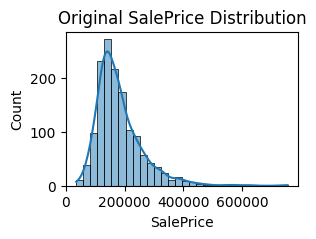

In [77]:
# Plot the original SalePrice distribution
plt.figure(figsize=(3, 2))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('Original SalePrice Distribution')
plt.show()

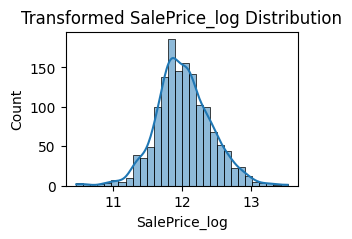

In [78]:
# Plot the transformed SalePrice_log distribution
plt.figure(figsize=(3, 2))
sns.histplot(train['SalePrice_log'], kde=True, bins=30)
plt.title('Transformed SalePrice_log Distribution')
plt.show()

#### Update the Target Variable

In [84]:
# Use 'SalePrice_log' as the target variable for training the model
X = train.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = train['SalePrice_log']

In [85]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, shuffle = True)

In [86]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1166, 76)
X_test shape: (292, 76)
y_train shape: (1166,)
y_test shape: (292,)


## Retrain the Models

### Linear Regression

In [87]:
lr_model = LinearRegression()

In [88]:
lr_model.fit(X_train, y_train_log)

LinearRegression()

In [89]:
y_pred_lr = lr_model.predict(X_test)
rmse_lr = mean_squared_error(y_test_log, y_pred_lr)
print("RMSE of Linear Regression:", rmse_lr)

RMSE of Linear Regression: 0.016758179446274668


#### Random Forest

In [90]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [91]:
rf_model.fit(X_train, y_train_log)

RandomForestRegressor(random_state=42)

In [92]:
y_pred_rf = rf_model.predict(X_test)
rmse_rf= mean_squared_error(y_test_log, y_pred_rf)
print("RMSE of Random Forest:", rmse_rf)

RMSE of Random Forest: 0.020643746935668457


#### XGBoost

In [93]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [94]:
xgb_model.fit(X_train, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [95]:
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test_log, y_pred_xgb)
print("RMSE of XGBoost:", rmse_xgb)

RMSE of XGBoost: 0.02058034989966097


### Prediction

In [97]:
X_test = final_test
y_test_log_pred = xgb_model.predict(X_test)
y_test_pred = np.exp(y_test_log_pred)
res_test = pd.DataFrame({'Id': final_test['Id'], 'SalePrice': y_test_pred})
res_test['SalePrice'] = res_test['SalePrice'].round(2)
res_test

,Id,SalePrice
0,1461,123701.531250
1,1462,155134.890625
2,1463,186972.453125
3,1464,185075.843750
4,1465,197494.140625
...,...,...
1454,2915,75231.468750
1455,2916,81897.656250
1456,2917,143371.265625
1457,2918,108926.820312
